# Importing Libraries & Loading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('02-20-2018.csv')
df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.31.69.25-94.231.103.172-22-45498-6,94.231.103.172,45498,172.31.69.25,22,6,20/02/2018 08:34:07,888751,11,11,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
1,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:33:22,112642816,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,Benign
2,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:36:11,112642712,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,Benign
3,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:39:00,112642648,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,Benign
4,8.0.6.4-8.6.0.1-0-0-0,8.6.0.1,0,8.0.6.4,0,0,20/02/2018 08:41:49,112642702,3,0,...,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,Benign


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7948748 entries, 0 to 7948747
Data columns (total 84 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Flow ID            object 
 1   Src IP             object 
 2   Src Port           int64  
 3   Dst IP             object 
 4   Dst Port           int64  
 5   Protocol           int64  
 6   Timestamp          object 
 7   Flow Duration      int64  
 8   Tot Fwd Pkts       int64  
 9   Tot Bwd Pkts       int64  
 10  TotLen Fwd Pkts    float64
 11  TotLen Bwd Pkts    float64
 12  Fwd Pkt Len Max    float64
 13  Fwd Pkt Len Min    float64
 14  Fwd Pkt Len Mean   float64
 15  Fwd Pkt Len Std    float64
 16  Bwd Pkt Len Max    float64
 17  Bwd Pkt Len Min    float64
 18  Bwd Pkt Len Mean   float64
 19  Bwd Pkt Len Std    float64
 20  Flow Byts/s        float64
 21  Flow Pkts/s        float64
 22  Flow IAT Mean      float64
 23  Flow IAT Std       float64
 24  Flow IAT Max       float64
 25  Flow IAT Min      

In [4]:
df['Label'].unique()

array(['Benign', 'DDoS attacks-LOIC-HTTP'], dtype=object)

In [5]:
df.isnull().sum()

Flow ID      0
Src IP       0
Src Port     0
Dst IP       0
Dst Port     0
            ..
Idle Mean    0
Idle Std     0
Idle Max     0
Idle Min     0
Label        0
Length: 84, dtype: int64

In [6]:
df.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,...,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06,7.948748e+06
mean,4.527693e+04,7.364011e+03,9.363284e+00,1.353327e+07,1.698159e+01,6.713097e+00,7.137929e+02,5.008268e+03,1.706698e+02,1.329747e+01,...,1.322718e+01,1.597078e+01,2.591440e+05,1.328942e+05,3.871102e+05,1.694898e+05,5.174784e+06,1.802277e+05,5.322670e+06,5.006831e+06
std,2.112095e+04,1.727306e+04,5.247283e+00,3.243525e+07,1.244368e+03,1.580529e+02,3.983634e+04,2.281501e+05,2.599629e+02,2.421130e+01,...,1.243023e+03,6.187313e+00,3.244362e+06,1.978675e+06,4.296665e+06,2.728013e+06,1.533011e+07,1.805569e+06,1.562210e+07,1.517835e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.970600e+04,5.300000e+01,6.000000e+00,4.480000e+02,1.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.241300e+04,8.000000e+01,6.000000e+00,5.207900e+04,2.000000e+00,1.000000e+00,4.300000e+01,1.080000e+02,4.100000e+01,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.779900e+04,3.389000e+03,1.700000e+01,3.170154e+06,7.000000e+00,5.000000e+00,3.910000e+02,9.640000e+02,1.940000e+02,3.400000e+01,...,3.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,1.700000e+01,1.200000e+08,2.800430e+05,2.580600e+04,8.961376e+06,3.758338e+07,5.647000e+03,1.460000e+03,...,2.800420e+05,4.800000e+01,1.132691e+08,7.523241e+07,1.132691e+08,1.132691e+08,1.200000e+08,7.639395e+07,1.200000e+08,1.200000e+08


In [7]:
df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

# Feature Selection

In [8]:
import xgboost as xg
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(columns = ['Label', 'Timestamp', 'Flow ID', 'Src IP', 'Dst IP'], axis = 1)
y = df['Label']

In [10]:
X

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,45498,22,6,888751,11,11,1249.0,1969.0,736.0,0.0,...,7,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0,0,0,112642816,3,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0
2,0,0,0,112642712,3,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0
3,0,0,0,112642648,3,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0
4,0,0,0,112642702,3,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7948743,42801,623,6,94042,2,1,0.0,0.0,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7948744,2178,22,6,251281,4,2,0.0,41.0,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7948745,14259,23,6,21,1,1,0.0,0.0,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7948746,54193,3039,6,181954,2,1,0.0,0.0,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [11]:
encoder = LabelEncoder()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6358998, 79), (1589750, 79), (6358998,), (1589750,))

In [13]:
X_train

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
3932885,51852,443,6,31007692,1,6,0.0,0.0,0.0,0.0,...,0,32,7008141.0,0.0,7008141.0,7008141.0,11999775.5,5.656801e+06,15999738.0,7999813.0
5308418,22717,3389,6,2559439,11,9,1148.0,2813.0,677.0,0.0,...,5,20,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
5200255,51801,443,6,198,3,0,77.0,0.0,46.0,0.0,...,1,20,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
3328095,56164,445,6,6382504,5,5,286.0,170.0,103.0,0.0,...,3,20,472261.0,0.0,472261.0,472261.0,5629124.0,0.000000e+00,5629124.0,5629124.0
2868960,63236,53,17,11943,1,1,34.0,50.0,34.0,34.0,...,0,8,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550634,5174,445,6,429151,7,5,364.0,583.0,103.0,0.0,...,4,20,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
7705870,50535,80,6,61,2,0,0.0,0.0,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
6423388,50465,53,17,426,1,1,43.0,59.0,43.0,43.0,...,0,8,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
6962611,33726,49152,6,1536582,4,2,13.0,0.0,13.0,0.0,...,1,32,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [14]:
original_feature_names = X_train.columns
original_feature_names

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       

In [15]:
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').values
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce').values

print("Infinities in X_train:", np.isinf(X_train).sum())
print("Infinities in X_test:", np.isinf(X_test).sum())

threshold = 1e+100
print("Large values in X_train:", (np.abs(X_train) > threshold).sum())
print("Large values in X_test:", (np.abs(X_test) > threshold).sum())

Infinities in X_train: 65543
Infinities in X_test: 16596
Large values in X_train: 65543
Large values in X_test: 16596


In [16]:
X_train[np.isinf(X_train)] = np.nan
X_test[np.isinf(X_test)] = np.nan

print("Infinities in X_train:", np.isinf(X_train).sum())
print("Infinities in X_test:", np.isinf(X_test).sum())

print("Large values in X_train:", (np.abs(X_train) > threshold).sum())
print("Large values in X_test:", (np.abs(X_test) > threshold).sum())

Infinities in X_train: 0
Infinities in X_test: 0
Large values in X_train: 0
Large values in X_test: 0


In [17]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train, columns=original_feature_names)
X_test = pd.DataFrame(X_test, columns=original_feature_names)

In [19]:
X_train

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,51852.0,443.0,6.0,31007692.0,1.0,6.0,0.0,0.0,0.0,0.0,...,0.0,32.0,7008141.0,0.0,7008141.0,7008141.0,11999775.5,5.656801e+06,15999738.0,7999813.0
1,22717.0,3389.0,6.0,2559439.0,11.0,9.0,1148.0,2813.0,677.0,0.0,...,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
2,51801.0,443.0,6.0,198.0,3.0,0.0,77.0,0.0,46.0,0.0,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
3,56164.0,445.0,6.0,6382504.0,5.0,5.0,286.0,170.0,103.0,0.0,...,3.0,20.0,472261.0,0.0,472261.0,472261.0,5629124.0,0.000000e+00,5629124.0,5629124.0
4,63236.0,53.0,17.0,11943.0,1.0,1.0,34.0,50.0,34.0,34.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358993,5174.0,445.0,6.0,429151.0,7.0,5.0,364.0,583.0,103.0,0.0,...,4.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
6358994,50535.0,80.0,6.0,61.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
6358995,50465.0,53.0,17.0,426.0,1.0,1.0,43.0,59.0,43.0,43.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
6358996,33726.0,49152.0,6.0,1536582.0,4.0,2.0,13.0,0.0,13.0,0.0,...,1.0,32.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [20]:
y_train = encoder.fit_transform(y_train)
print(y_train)

[0 0 0 ... 0 0 0]


In [21]:
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
importance = model.get_booster().get_score(importance_type='weight', max_num_features = 10)
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature04', 'Importance04'])
importance_df = importance_df.sort_values(by = 'Importance04', ascending = False)
importance_df.to_csv('File04_XG.csv',  index = False)
importance_df.head()

,Feature04,Importance04
0,Src Port,212.0
33,Init Fwd Win Byts,205.0
18,Flow IAT Min,72.0
19,Fwd IAT Tot,68.0
7,Fwd Pkt Len Max,66.0


<Figure size 1000x600 with 0 Axes>

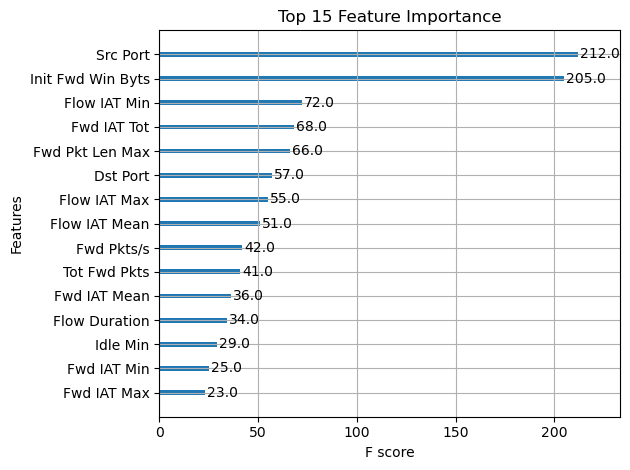

In [23]:
plt.figure(figsize=(10, 6))
xg.plot_importance(model, importance_type='weight', max_num_features=15)
plt.title('Top 15 Feature Importance')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
labels = df['Label'].unique()

In [25]:
labels

array(['Benign', 'DDoS attacks-LOIC-HTTP'], dtype=object)